### Time Series Forecasting Task:
* Load a time series dataset (e.g., stock prices, weather data).
* Build a recurrent neural network (RNN) or LSTM model using Keras.
* Train the model to forecast future values based on historical data.
* Evaluate the model's performance using appropriate metrics (e.g., MAE, RMSE).

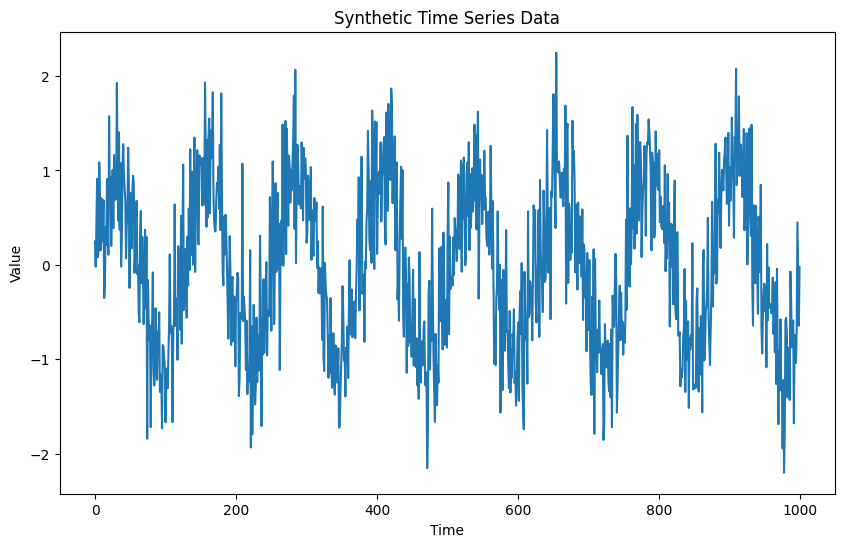

In [16]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42) # for reproducibility
time = np.arange(0, 1000, 1)
sinewave = np.sin(time * 0.05) + np.random.normal(scale=0.5, size=len(time))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(sinewave)
plt.title("Synthetic Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


In [2]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
sinewave_scaled = scaler.fit_transform(sinewave.reshape(-1, 1))

# Function to create a dataset for LSTM
def create_dataset(data, look_back=60):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split into train and test sets
train_size = int(len(sinewave_scaled) * 0.67)
test_size = len(sinewave_scaled) - train_size
train, test = sinewave_scaled[0:train_size,:], sinewave_scaled[train_size:len(sinewave_scaled),:]
X_train, Y_train = create_dataset(train, 60)
X_test, Y_test = create_dataset(test, 60)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

X_train.shape, X_test.shape


((609, 1, 60), (269, 1, 60))

In [3]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                22200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 22251 (86.92 KB)
Trainable params: 22251 (86.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, input_shape=(1, 60))) # Input shape: [time steps, features]
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [5]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)


Epoch 1/100
20/20 - 5s - loss: 0.1152 - val_loss: 0.0494 - 5s/epoch - 252ms/step
Epoch 2/100
20/20 - 0s - loss: 0.0346 - val_loss: 0.0269 - 95ms/epoch - 5ms/step
Epoch 3/100
20/20 - 0s - loss: 0.0229 - val_loss: 0.0177 - 98ms/epoch - 5ms/step
Epoch 4/100
20/20 - 0s - loss: 0.0170 - val_loss: 0.0146 - 93ms/epoch - 5ms/step
Epoch 5/100
20/20 - 0s - loss: 0.0149 - val_loss: 0.0133 - 99ms/epoch - 5ms/step
Epoch 6/100
20/20 - 0s - loss: 0.0143 - val_loss: 0.0133 - 92ms/epoch - 5ms/step
Epoch 7/100
20/20 - 0s - loss: 0.0143 - val_loss: 0.0160 - 94ms/epoch - 5ms/step
Epoch 8/100
20/20 - 0s - loss: 0.0152 - val_loss: 0.0127 - 92ms/epoch - 5ms/step
Epoch 9/100
20/20 - 0s - loss: 0.0137 - val_loss: 0.0127 - 86ms/epoch - 4ms/step
Epoch 10/100
20/20 - 0s - loss: 0.0133 - val_loss: 0.0128 - 84ms/epoch - 4ms/step
Epoch 11/100
20/20 - 0s - loss: 0.0134 - val_loss: 0.0128 - 98ms/epoch - 5ms/step
Epoch 12/100
20/20 - 0s - loss: 0.0143 - val_loss: 0.0128 - 88ms/epoch - 4ms/step
Epoch 13/100
20/20 - 0s -

### Image Classification Task:
* Load the MNIST dataset.
* Build a simple convolutional neural network (CNN) using Keras Sequential model.
* Train the CNN model on the MNIST dataset.
* Evaluate the model's performance on a test set and report accuracy.
* Use grid search to optimize hyperparameters such as learning rate, batch size, and
optimizer choice.
* Use Callback functions to automate training process like “ReduceLROnPlateau” and keep
check on validation loss. Also use history object for result visualization.

In [8]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# Normalize from 0-255 to 0-1
X_train /= 255
X_test /= 255

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
from keras.callbacks import ReduceLROnPlateau

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, callbacks=[reduce_lr], verbose=2)


Epoch 1/10
300/300 - 35s - loss: 0.2340 - accuracy: 0.9331 - val_loss: 0.0706 - val_accuracy: 0.9774 - lr: 0.0010 - 35s/epoch - 117ms/step
Epoch 2/10
300/300 - 28s - loss: 0.0654 - accuracy: 0.9805 - val_loss: 0.0576 - val_accuracy: 0.9807 - lr: 0.0010 - 28s/epoch - 95ms/step
Epoch 3/10
300/300 - 29s - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.0449 - val_accuracy: 0.9852 - lr: 0.0010 - 29s/epoch - 96ms/step
Epoch 4/10
300/300 - 29s - loss: 0.0347 - accuracy: 0.9897 - val_loss: 0.0375 - val_accuracy: 0.9870 - lr: 0.0010 - 29s/epoch - 97ms/step
Epoch 5/10
300/300 - 29s - loss: 0.0275 - accuracy: 0.9918 - val_loss: 0.0353 - val_accuracy: 0.9878 - lr: 0.0010 - 29s/epoch - 96ms/step
Epoch 6/10
300/300 - 26s - loss: 0.0220 - accuracy: 0.9934 - val_loss: 0.0357 - val_accuracy: 0.9897 - lr: 0.0010 - 26s/epoch - 86ms/step
Epoch 7/10
300/300 - 25s - loss: 0.0170 - accuracy: 0.9950 - val_loss: 0.0414 - val_accuracy: 0.9869 - lr: 0.0010 - 25s/epoch - 83ms/step
Epoch 8/10
300/300 - 25s - loss: 

In [11]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


CNN Error: 1.24%


In [13]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def build_model(learning_rate=0.001):
    model = Sequential([
        Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Grid search settings
learning_rates = [0.001, 0.0001]
batch_sizes = [32, 64]

# Grid search
best_accuracy = 0
best_lr = 0
best_batch = 0

for lr in learning_rates:
    for batch_size in batch_sizes:
        model = build_model(learning_rate=lr)
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=batch_size, verbose=0)
        accuracy = np.max(history.history['val_accuracy'])
        print(f"LR={lr}, Batch={batch_size}, Val Accuracy={accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr = lr
            best_batch = batch_size

print(f"Best parameters: LR={best_lr}, Batch={best_batch}, with accuracy={best_accuracy}")


LR=0.001, Batch=32, Val Accuracy=0.988099992275238
LR=0.001, Batch=64, Val Accuracy=0.9894000291824341
LR=0.0001, Batch=32, Val Accuracy=0.9847999811172485
LR=0.0001, Batch=64, Val Accuracy=0.9797000288963318
Best parameters: LR=0.001, Batch=64, with accuracy=0.9894000291824341


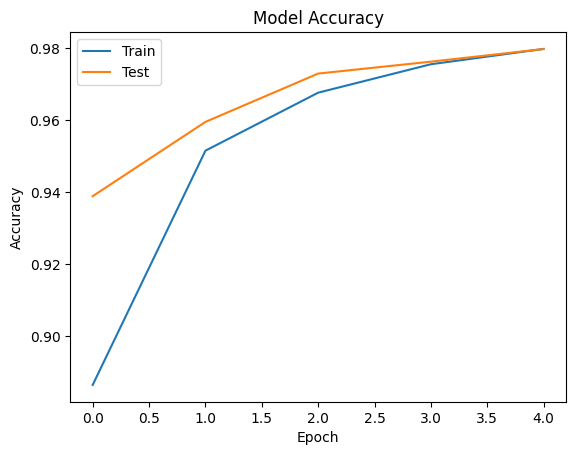

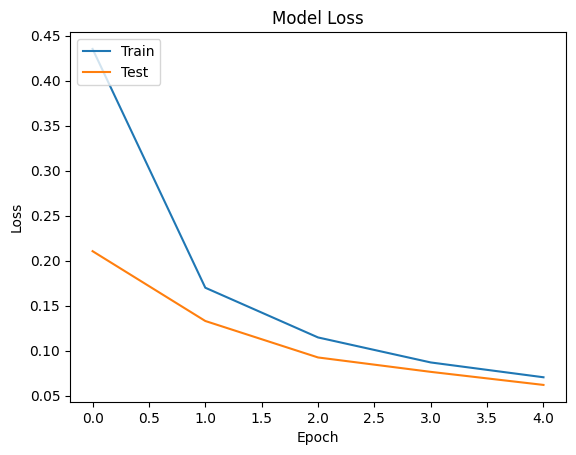

In [15]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
